# Notebook de nettoyage des données

## 1. Filtrage des features et produits

### 1.1 Importation des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/home/fayz/Documents/OpenClassrooms/Projet2/food.csv', sep = "\t", low_memory = False)

In [2]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

### 1.2 Prise de contact avec les features

In [3]:
col = data.columns
col_nombre = round(data.count()/max(data.count())*100,2)
print(col_nombre)


code                        99.99
url                         99.99
creator                    100.00
created_t                  100.00
created_datetime           100.00
                            ...  
carbon-footprint_100g        0.08
nutrition-score-fr_100g     68.96
nutrition-score-uk_100g     68.96
glycemic-index_100g          0.00
water-hardness_100g          0.00
Length: 162, dtype: float64


### 1.3 Affichage du taux de remplissage des colonnes

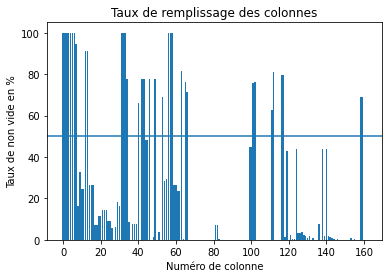

In [4]:
col = data.columns
col_nombre = data.count()
plt.title('Taux de remplissage des colonnes')
plt.xlabel('Numéro de colonne')
plt.ylabel('Taux de non vide en %')
plt.bar(range(len(col)),col_nombre/col_nombre[0]*100)
plt.axhline(y=50,xmin = 0, xmax = len(col))
plt.show()

### 1.4 Traitement des colonnes vides

In [5]:
print("Nom des colonnes vides")
print(col[col_nombre == 0])

Nom des colonnes vides
Index(['no_nutriments', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       'butyric-acid_100g', 'caproic-acid_100g', 'lignoceric-acid_100g',
       'cerotic-acid_100g', 'melissic-acid_100g', 'elaidic-acid_100g',
       'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g',
       'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g'],
      dtype='object')


In [6]:
data.drop(data[col[col_nombre==0]], axis = 1, inplace = True)

**En retirant toutes les colonnes vides, on passe de 162 à 146 colonnes**

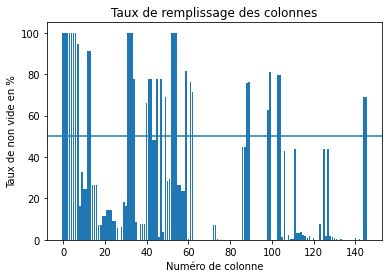

In [7]:
col = data.columns
col_nombre = data.count()
plt.title('Taux de remplissage des colonnes')
plt.xlabel("Numéro de colonne")
plt.ylabel("Taux de non vide en %")
plt.bar(range(len(col)),col_nombre/col_nombre[0]*100)
plt.axhline(y=50,xmin = 0, xmax = len(col))
plt.show()

In [8]:
data = data.reset_index()

### 1.5 Filtre sur les données françaises

**On ne s'intérresse qu'aux produits français et on veut proposer un produit avec un meilleur nutriscore de la même catégorie, on peut supprimer les produits d'autres pays**

Les 11 premiers pays représentent 95.78 % du total


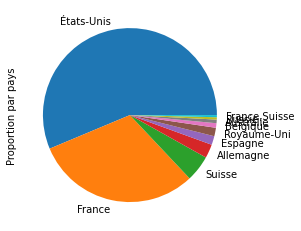

In [9]:
print('Les 11 premiers pays représentent', round(sum(data['countries_fr'].value_counts()[0:10])/max(data.count())*100,2),'% du total')
data['countries_fr'].value_counts()[0:10].plot.pie()
plt.ylabel("Proportion par pays")
plt.show()

In [10]:
data_fr = data[data.countries_fr == "France"]
data_fr = data_fr.reset_index()

In [11]:
print("Après filtre on a encore",round(data_fr.shape[0]/data.shape[0]*100,2),'% de données')
print("Notre nouveau jeu de données compte : ", data_fr.shape[0], "lignes et", data_fr.shape[1], "colonnes avant nettoyage.")

Après filtre on a encore 29.43 % de données
Notre nouveau jeu de données compte :  94392 lignes et 148 colonnes avant nettoyage.


In [12]:
col = data_fr.columns
col_nombre = data_fr.count()
data_fr.drop(data_fr[col[col_nombre==0]], axis = 1, inplace = True)

### 1.6 Suppression des colonnes inutiles

In [13]:
round(data_fr.count()/max(data_fr.count())*100,2)

level_0                             100.00
index                               100.00
code                                100.00
url                                 100.00
creator                             100.00
                                     ...  
collagen-meat-protein-ratio_100g      0.17
cocoa_100g                            0.62
carbon-footprint_100g                 0.18
nutrition-score-fr_100g              61.98
nutrition-score-uk_100g              61.98
Length: 138, dtype: float64

In [14]:
tup = []
a = data_fr.count()<max(data_fr.count())*0.4
for i in range(len(a)):
    if (a[i] == True):
        tup.append(a.index[i])

In [15]:
data_fr.drop(tup, axis = 1, inplace = True)

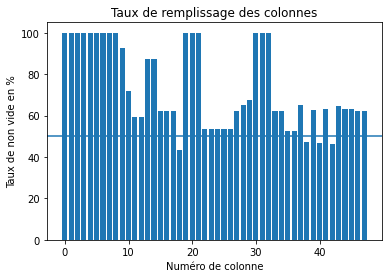

In [16]:
col = data_fr.columns
col_nombre = data_fr.count()
plt.title('Taux de remplissage des colonnes')
plt.xlabel("Numéro de colonne")
plt.ylabel("Taux de non vide en %")
plt.bar(range(len(col)),col_nombre/col_nombre[0]*100)
plt.axhline(y=50,xmin = 0, xmax = len(col))
plt.show()

**On garde les features qui nous intéresse parmi les premières triée**

In [17]:
keep = ['product_name',\
        'brands',\
        'additives_n',\
        'packaging',\
        'nutrition_grade_fr',\
        'pnns_groups_1',\
        'pnns_groups_2',\
        'energy_100g',\
        'fat_100g',\
        'saturated-fat_100g',\
        'carbohydrates_100g',\
        'sugars_100g',\
        'fiber_100g',\
        'proteins_100g',\
        'salt_100g']
data_fr = data_fr.iloc[:,data_fr.columns.isin(keep)]


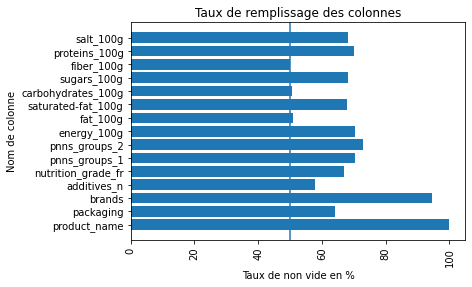

In [18]:
col = data_fr.columns
col_nombre = data_fr.count()
plt.title('Taux de remplissage des colonnes')
plt.ylabel("Nom de colonne")
plt.xlabel("Taux de non vide en %")
plt.xticks(rotation = 90)
plt.barh(col,col_nombre/col_nombre[0]*100)
plt.axvline(x=50)
plt.show()

### 1.7 Filtre sur les produits sans nom et suppressions des doublons

In [19]:
data_fr.product_name.isna().value_counts()

False    87398
True      6994
Name: product_name, dtype: int64

In [20]:
data_fr = data_fr[data_fr.product_name.isna()==False]

In [21]:
data_fr = data_fr.reset_index()
data_fr.drop('index',axis = 1,inplace = True)

In [22]:
data_fr.head()

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Filet de bœuf,plastique,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Twix x2,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lentilles vertes,Sachet plastique,Bertrand Lejeune,0.0,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Biscuits sablés fourrage au cacao,"Carton,boîte",St Michel,3.0,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(data_fr.duplicated().value_counts())

False    86881
True       517
dtype: int64


In [24]:
df = data_fr.drop_duplicates()
df = df.reset_index()
df.drop('index',axis = 1,inplace = True)
print(df.duplicated().value_counts())

False    86881
dtype: int64


In [25]:
round(df.count()/max(df.count())*100,2)

product_name          100.00
packaging              63.85
brands                 93.72
additives_n            57.87
nutrition_grade_fr     66.84
pnns_groups_1          69.27
pnns_groups_2          71.48
energy_100g            70.19
fat_100g               50.85
saturated-fat_100g     67.86
carbohydrates_100g     50.38
sugars_100g            67.96
fiber_100g             49.93
proteins_100g          69.90
salt_100g              68.03
dtype: float64

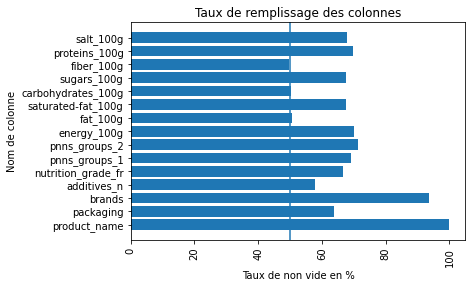

In [26]:
col = data_fr.columns
col_nombre = data_fr.count()
plt.title('Taux de remplissage des colonnes')
plt.ylabel("Nom de colonne")
plt.xlabel("Taux de non vide en %")
plt.xticks(rotation = 90)
plt.barh(col,col_nombre/col_nombre[0]*100)
plt.axvline(x=50)
plt.show()

## 2. Traitement des valeurs aberrantes

### 2.1 Apercu général

In [27]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,50282.000000,6.098000e+04,44179.000000,58954.000000,43767.00000,59044.000000,43378.000000,60731.000000,59102.000000
mean,1.858777,1.167765e+03,13.276896,5.387137,27.32515,13.236850,2.525191,7.799500,1.162860
std,2.567380,1.320636e+04,16.981752,8.540098,27.31311,19.024517,4.643673,7.933839,4.303963
min,0.000000,0.000000e+00,0.000000,0.000000,0.00000,-0.100000,0.000000,0.000000,0.000000
25%,0.000000,4.270000e+02,1.300000,0.300000,4.00000,1.000000,0.000000,1.800000,0.080000
50%,1.000000,1.029000e+03,6.800000,1.900000,14.00000,4.000000,1.300000,6.000000,0.570000
75%,3.000000,1.639000e+03,21.000000,7.300000,52.70000,17.000000,3.200000,11.000000,1.250000
max,31.000000,3.251373e+06,380.000000,210.000000,190.00000,105.000000,178.000000,100.000000,211.000000


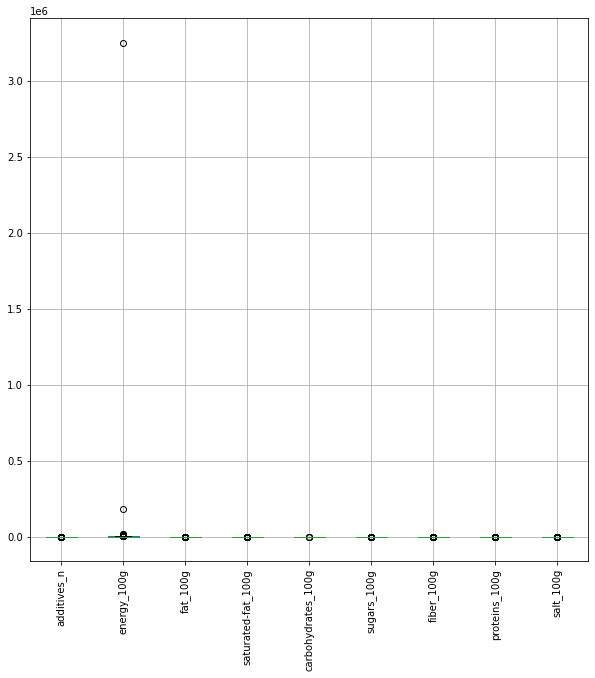

In [28]:
plt.subplots(figsize = (10,10))
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

### 2.2 Traitement de chaque colonne

#### Energy_100g

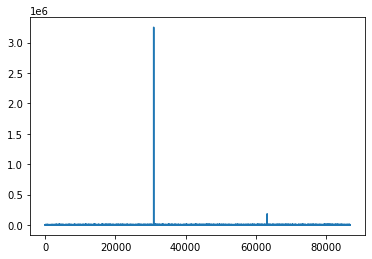

In [29]:
plt.plot(df.energy_100g)

In [30]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df.energy_100g>4000,'energy_100g'].count()/df.energy_100g.count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.13 %


In [31]:
df.loc[df.energy_100g>4000,'energy_100g'] = np.nan

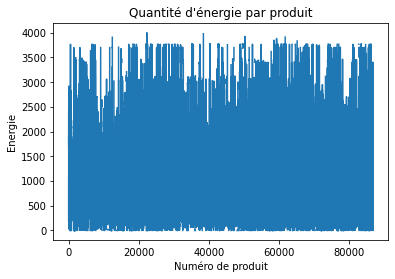

In [32]:
plt.title("Quantité d'énergie par produit")
plt.ylabel('Energie')
plt.xlabel('Numéro de produit')
plt.plot(df.energy_100g)
plt.show()

#### Fat_100g

In [33]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df.fat_100g>100,'fat_100g'].count()/df.fat_100g.count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.0 %


In [34]:
df[df['fat_100g']>100]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
59813,mini choux goût fromage de chèvre - poivre,"étui carton,film plastique",Auchan,7.0,e,Salty snacks,Appetizers,NaN,380.0,210.0,190.0,22.7,0.0,0.0,9.33
82196,Graine de couscous moyen,Boîte carton,La méditerranéa,NaN,a,Cereals and potatoes,Cereals,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01


Il s'agit très clairement d'erreurs

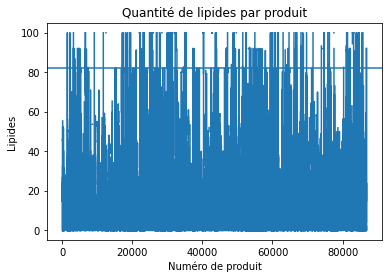

In [35]:
plt.title("Quantité de lipides par produit")
plt.ylabel('Lipides')
plt.xlabel('Numéro de produit')
df.loc[df.fat_100g>100,'fat_100g'] = np.nan
plt.plot(df.fat_100g)
plt.axhline(y=82)
plt.show()

In [36]:
df[df['fat_100g']==100]['pnns_groups_2'].value_counts()

Fats                    252
unknown                   6
Dressings and sauces      2
Name: pnns_groups_2, dtype: int64

Quelques erreurs dans le dataset, aucun snack n'est fait à 100% de graisses

#### Satured-fat_100g

In [37]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['saturated-fat_100g']>100,'saturated-fat_100g'].count()/df['saturated-fat_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.0 %


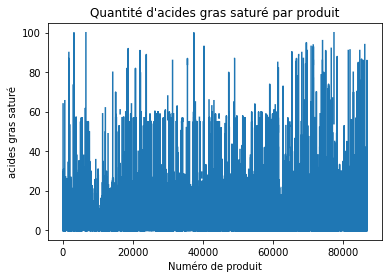

In [38]:
plt.title("Quantité d'acides gras saturé par produit")
plt.ylabel('acides gras saturé')
plt.xlabel('Numéro de produit')
df.loc[df['saturated-fat_100g']>100,'saturated-fat_100g'] = np.nan
plt.plot(df['saturated-fat_100g'])
plt.show()

In [39]:
df[df['saturated-fat_100g']==100]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
3196,Frites & Fritures,carton,Vita d'Or,0.0,e,Fat and sauces,Fats,3700.0,100.0,100.0,0.0,0.0,NaN,0.0,0.0
6603,Jog'Frit,Carton,Jog'Frit,0.0,e,Fat and sauces,Fats,3700.0,100.0,100.0,0.0,0.0,NaN,0.0,0.0
37418,Huile De Tournesol Végétale 2 Litre,NaN,Carrefour,NaN,e,NaN,NaN,3766.0,NaN,100.0,NaN,0.0,0.0,0.0,0.0
73922,Végétaline (offre familiale),Carton,Végétaline,NaN,d,Fat and sauces,Fats,3700.0,100.0,100.0,0.0,0.0,NaN,0.0,0.0
77409,Eau,NaN,Vital,NaN,e,NaN,NaN,418.0,NaN,100.0,NaN,100.0,100.0,100.0,2.0


Informations cohérentes avec la source :
https://fr.openfoodfacts.org/produit/20022082/frites-fritures-vita-d-or

Erreur tout de même sur l'eau

#### Carbohydrates_100g

In [40]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['carbohydrates_100g']>100,'carbohydrates_100g'].count()/df['carbohydrates_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.02 %


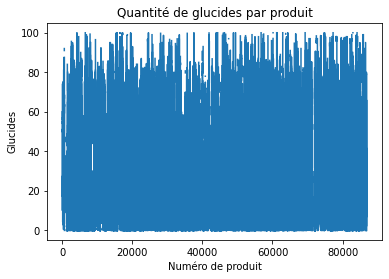

In [41]:
plt.title("Quantité de glucides par produit")
plt.ylabel('Glucides')
plt.xlabel('Numéro de produit')
df.loc[df['carbohydrates_100g']>100,'carbohydrates_100g'] = np.nan
plt.plot(df['carbohydrates_100g'])
plt.show()

In [42]:
df[df['carbohydrates_100g']==100]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
1744,cassonade,carton,Erstein,0.0,NaN,Sugary snacks,Sweets,1674.0,0.0,NaN,100.0,NaN,NaN,0.0,NaN
4183,Sucres en morceaux,"boite,carton,paquet",Navarre,0.0,d,Sugary snacks,Sweets,1699.0,0.0,0.0,100.0,100.0,0.0,1.0,0.000000
6574,Cassonade Sucre roux en poudre,carton,Sucandise,NaN,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,0.0,0.0,0.000000
12276,Sucre semoule fine,"Paquet,paquet",Erstein,0.0,NaN,Sugary snacks,Sweets,1674.0,NaN,NaN,100.0,100.0,NaN,NaN,NaN
15544,Sucre Glace Daddy,"Plastique,pot,boîte verseuse,plastique","Daddy,CristalCo",0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,98.0,NaN,2.0,0.000000
15547,Petits cubes pure canne bio,carton,Daddy,0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,NaN,0.0,0.000000
15548,Sucre en poudre,"plastique,doypack,Plastique",Daddy,0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,NaN,0.0,0.000000
15549,Cassonade Pure Canne,"plastique,Doypack,Plastique",Daddy,0.0,d,Sugary snacks,Sweets,1674.0,0.0,0.0,100.0,100.0,0.0,0.0,0.000000
15550,Sucre extra fin à patisser,"Pochette & embout refermable plastique,pochett...","Daddy,CritalCo",1.0,d,Sugary snacks,Sweets,1674.0,0.0,0.0,100.0,100.0,NaN,0.0,0.000000
15553,Sucre pure canne bio,"Sachet,Plastique",Daddy,0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,NaN,0.0,0.000000


Données cohérentes

#### Sugars_100g

In [43]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['sugars_100g']>100,'sugars_100g'].count()/df['sugars_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.01 %


In [44]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['sugars_100g']<0,'sugars_100g'].count()/df['sugars_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.0 %


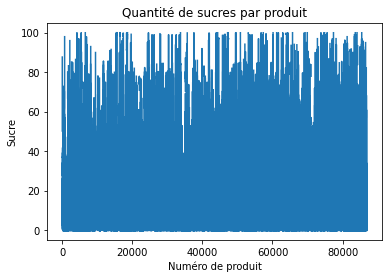

In [45]:
df.loc[df['sugars_100g']>100,'sugars_100g'] = np.nan
df.loc[df['sugars_100g']<0,'sugars_100g'] = np.nan
plt.title("Quantité de sucres par produit")
plt.ylabel('Sucre')
plt.xlabel('Numéro de produit')
plt.plot(df['sugars_100g'])
plt.show()

In [46]:
df[df['sugars_100g']==100]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
4183,Sucres en morceaux,"boite,carton,paquet",Navarre,0.0,d,Sugary snacks,Sweets,1699.0,0.0,0.0,100.0,100.0,0.0,1.0,0.000
5403,Cassonade,produit,Navarre,NaN,d,NaN,NaN,1674.0,NaN,0.5,NaN,100.0,0.0,0.5,0.010
6574,Cassonade Sucre roux en poudre,carton,Sucandise,NaN,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,0.0,0.0,0.000
12276,Sucre semoule fine,"Paquet,paquet",Erstein,0.0,NaN,Sugary snacks,Sweets,1674.0,NaN,NaN,100.0,100.0,NaN,NaN,NaN
12279,Sucre semoule fine,plastique,Erstein,0.0,d,unknown,unknown,1674.0,NaN,0.0,NaN,100.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82951,Sucre en poudre,"Sachet,Papier",Sucran,0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,0.0,0.0,0.000
83630,Sucre roux de canne,"Boite,Carton",Dia,0.0,d,Sugary snacks,Sweets,1674.0,NaN,0.0,NaN,100.0,0.0,0.0,0.000
84133,Sucre blanc,"Sachet papier,es:Cartón,pt:Cartão,Point vert,s...",Dia,0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,0.0,0.0,0.000
85470,Morceaux de sucre N°4,Carton,Sans marque,0.0,d,Sugary snacks,Sweets,1700.0,0.0,0.0,100.0,100.0,0.0,0.0,0.000


Données cohérentes

#### Fiber_100g

In [47]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['fiber_100g']>20,'fiber_100g'].count()/df['fiber_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.87 %


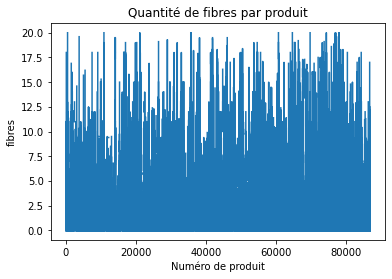

In [48]:
df.loc[df['fiber_100g']>20,'fiber_100g'] = np.nan
plt.title("Quantité de fibres par produit")
plt.ylabel('fibres')
plt.xlabel('Numéro de produit')
plt.plot(df['fiber_100g'])
plt.show()

In [49]:
df[df['fiber_100g']==20]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
512,Pain Seigle au Sésame,NaN,Ryvita,NaN,a,Cereals and potatoes,Cereals,1464.0,NaN,0.00,NaN,0.00,20.0,10.0,0.350
10896,Mélange pour Minestrone,"Sachet,Plastique",Vivien Paille,0.0,a,Cereals and potatoes,Legumes,1316.0,2.3,0.40,44.0,3.90,20.0,19.0,0.060
21133,Superlevure,"Flacon,Verre",Gayelord Hauser,0.0,a,unknown,unknown,1369.0,3.5,1.50,21.5,2.00,20.0,42.0,0.380
35672,Lentilles vertes du Puy,NaN,La Vie Claire,NaN,a,Cereals and potatoes,Legumes,1443.0,1.6,0.30,58.0,3.90,20.0,24.0,0.000
35783,Chocolat Noir 72% de Cacao Aux Fèves De Cacao,NaN,La Vie Claire,NaN,d,Sugary snacks,Chocolate products,2339.0,NaN,27.00,NaN,16.00,20.0,9.0,0.010
35787,Chocolat Noir 72% de Cacao,"Tablette,Aluminium,papier",La Vie Claire,0.0,d,Sugary snacks,Chocolate products,2339.0,45.0,22.00,22.0,16.00,20.0,9.0,0.010
39150,Pommes golden delicious,NaN,Cardeli,NaN,a,NaN,NaN,222.0,NaN,0.00,NaN,11.00,20.0,0.0,0.000
40977,Tripes Au Boeuf Et Jambon,NaN,Le Revelois,NaN,a,NaN,NaN,397.0,NaN,1.93,NaN,0.72,20.0,12.5,0.980
60706,Lentilles blondes,NaN,Auchan,NaN,a,NaN,NaN,1385.0,NaN,0.28,NaN,1.80,20.0,24.0,0.010
64677,Mix Salade,plastique,Moulin d'Amhara,0.0,b,unknown,unknown,2248.0,43.0,5.00,26.0,1.00,20.0,20.0,0.053


Données cohérentes

#### Proteins_100g

In [50]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['proteins_100g']>40,'proteins_100g'].count()/df['proteins_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.35 %


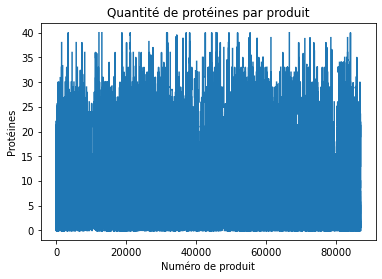

In [51]:
df.loc[df['proteins_100g']>40,'proteins_100g'] = np.nan
plt.title("Quantité de protéines par produit")
plt.ylabel('Protéines')
plt.xlabel('Numéro de produit')
plt.plot(df['proteins_100g'])
plt.show()

In [52]:
df[df['proteins_100g']==40].head()

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
1212,Viande De Grisons,NaN,Carrefour,NaN,d,NaN,NaN,812.0,NaN,3.4,NaN,1.4,0.5,40.0,4.4
1215,Viande des Grisons,"Barquette,Plastique,Sous atmosphère protectrice",Carrefour,2.0,d,Fish Meat Eggs,Processed meat,818.0,3.4,1.4,0.5,0.5,0.5,40.0,4.4
3444,Lomo Embuchado - Longe de porc,Blister plastique,Sol & Mar,5.0,d,unknown,unknown,987.0,8.0,3.4,1.0,1.0,NaN,40.0,5.0
12219,Evian fruits & plantes eau des alpes + citron ...,NaN,Evian,NaN,d,NaN,NaN,1046.0,NaN,2.0,NaN,25.0,0.0,40.0,2.0
13051,Fluette De Jambon,NaN,Loste,NaN,d,Fish Meat Eggs,Processed meat,1059.0,NaN,3.6,NaN,3.0,0.0,40.0,4.2


Données cohérentes

#### Salt_100g

In [53]:
print('Pourcentage de valeur à neutraliser : ',round(df.loc[df['salt_100g']>100,'salt_100g'].count()/df['salt_100g'].count()*100,2),'%')

Pourcentage de valeur à neutraliser :  0.0 %


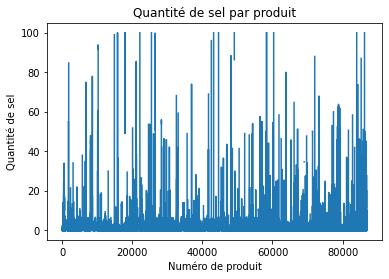

In [54]:
df.loc[df['salt_100g']>100,'salt_100g'] = np.nan
plt.title("Quantité de sel par produit")
plt.ylabel('Quantité de sel')
plt.xlabel('Numéro de produit')
plt.plot(df['salt_100g'])
plt.show()

In [55]:
df[df['salt_100g']==100].head()

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
15774,Moulin Sel de Guérande,"Flacon,Verre,Moulin",Ducros,0.0,c,unknown,unknown,8.0,NaN,0.1,NaN,0.0,0.0,0.08,100.0
17921,Véritable sel de mer la baleine,NaN,La baleine,NaN,c,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.00,100.0
17923,Le saunier de camargue,NaN,Le Saunier De Gamargue,NaN,e,unknown,unknown,243.0,NaN,36.0,NaN,0.5,0.0,NaN,100.0
22146,Sel de Guérande,Carton,Reflets de France,0.0,c,unknown,unknown,0.0,NaN,0.0,NaN,0.0,0.0,0.00,100.0
25456,Sel fin de Guerande,NaN,Itineraires des saveurs,NaN,c,unknown,unknown,0.0,NaN,0.0,NaN,0.0,0.0,0.00,100.0


Quelques données incohérentes, un filtre à faire selon la catégorie ?

### 2.3 Traitement des lignes aberrantes

In [56]:
df.head()

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Filet de bœuf,plastique,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Twix x2,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lentilles vertes,Sachet plastique,Bertrand Lejeune,0.0,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Biscuits sablés fourrage au cacao,"Carton,boîte",St Michel,3.0,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
col_interet = ['fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g']
a = np.sum(df.loc[:,col_interet], axis = 1)>102

On laisse une marge de 2% d'erreurs et supprime les autres données

In [58]:
max(df.count())

86881

In [59]:
df.drop(df[a].index,axis = 0, inplace = True)

In [60]:
max(df.count())

86716

##### Saturated_fat > fat

In [61]:
df.loc[df['saturated-fat_100g']>df['fat_100g']] 

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
736,Sriracha Stærk Chili Sauce,NaN,Royal canin,4.0,d,unknown,unknown,510.0,0.00,0.1,28.00,18.00,0.0,1.8,7.31520
3047,Amandes en poudre,"Sachet,Plastique,Plastique 05,Polypropylène,sa...","Maerschimport,Lidl",0.0,d,unknown,unknown,2570.0,54.80,73.8,7.00,5.50,9.4,20.5,0.07000
3264,Macarons de coco,Sachet plastique,Sondey,3.0,e,Sugary snacks,Biscuits and cakes,1990.0,23.00,23.1,60.00,48.00,NaN,4.5,0.20000
3315,"Favorina, Haselnuss Nougat Eier",NaN,Favorina,3.0,e,NaN,NaN,2360.0,9.94,14.5,7.05,48.60,0.0,8.2,0.66040
7011,Bonbons Cassis Sans Sucre,Carton,Feel free,4.0,b,Sugary snacks,Sweets,1000.0,0.00,0.5,98.00,0.50,0.5,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80674,Ginger San Benedetto,NaN,San benedetto,NaN,d,NaN,NaN,13.0,0.00,2.5,6.30,1.73,0.0,3.0,6.00000
81340,Tic Tac - Menthe,Plastique,Tic Tac,2.0,d,Sugary snacks,Sweets,1661.0,0.30,0.5,97.50,94.50,0.0,0.1,0.02800
81401,Tic Tac Menthe,Boite plastique,Tic Tac,2.0,d,Sugary snacks,Sweets,1661.0,0.00,0.5,97.50,94.50,0.0,0.1,0.02800
82451,Buongrano,NaN,Mulino Bianco,NaN,c,NaN,NaN,1891.0,0.00,1.6,0.00,20.50,8.7,7.7,0.54300


In [62]:
df.loc[df['saturated-fat_100g']>df['fat_100g'],('fat_100g','saturated-fat_100g')] = np.nan

In [63]:
df.loc[df['saturated-fat_100g']>df['fat_100g']]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g


##### sugars > carbohydrates

In [64]:
df.loc[df['sugars_100g']>df['carbohydrates_100g']]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
1761,Alo exposed,NaN,Alo,NaN,c,NaN,NaN,251.0,0.0,0.0,6.25,15.0,0.0,0.0,0.03048
3315,"Favorina, Haselnuss Nougat Eier",NaN,Favorina,3.0,e,NaN,NaN,2360.0,NaN,NaN,7.05,48.6,0.0,8.2,0.66040
3757,Fromage blanc saveur vanille,"Pots,Plastique",Milbona,5.0,b,Milk and dairy products,Cheese,406.0,2.2,1.5,13.00,14.0,0.0,5.4,0.08000
3758,Fromage blanc 20 % nature,"carton,pot plastique",Milbona,0.0,a,Milk and dairy products,Cheese,305.0,3.3,2.0,3.50,3.9,0.0,7.3,0.10000
3925,Foie gras de canard entier,"Frais,Boîte,Carton,Plastique,Semi-conserve,Sou...",G succes gourmand,1.0,e,unknown,unknown,2276.0,59.9,23.6,1.72,2.2,0.0,7.5,1.27000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80899,Mielbio de Châtaignier,"Bocal,verre",Rigoni di asiago,0.0,d,Sugary snacks,Sweets,1347.0,0.0,0.0,75.00,80.0,0.0,0.0,0.00000
82451,Buongrano,NaN,Mulino Bianco,NaN,c,NaN,NaN,1891.0,NaN,NaN,0.00,20.5,8.7,7.7,0.54300
83449,Chiffonade,"Barquette,Plastique,Frais",Casa Ramon,2.0,d,Fish Meat Eggs,Processed meat,853.0,8.2,3.1,0.10,0.3,NaN,32.3,4.96000
84059,Filets d'anchois à l'huile d'olive,pot de verre,Dia,0.0,d,Fish Meat Eggs,Fish and seafood,825.0,11.0,3.2,1.60,2.0,0.0,23.0,15.72000


In [65]:
df.loc[df['sugars_100g']>df['carbohydrates_100g'],('carbohydrates_100g','sugars_100g')] = np.nan

In [66]:
df.loc[df['sugars_100g']>df['carbohydrates_100g']]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g


##### Suppression des alcools

In [67]:
df.drop(df[df['pnns_groups_2']=="Alcoholic beverages"].index,axis = 0,inplace = True)

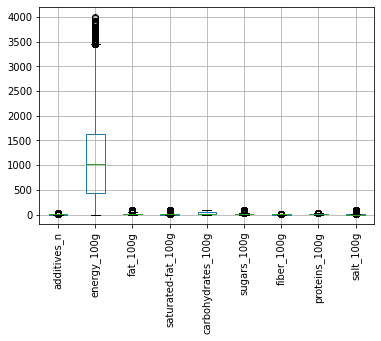

In [68]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

## 3. Valeurs manquantes

##### Nombre de NaN par lignes

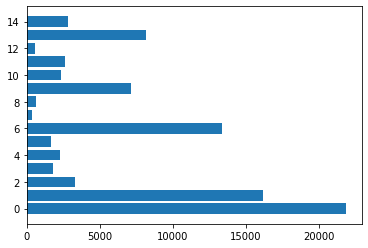

In [69]:
#plt.hist(df.isnull().sum(axis = 1).uniques(),df.isnull().sum(axis = 1).count())
#print(len(df.columns))
plt.title = "Nombre de ligne selon le nombre de NAN"
plt.xlabel = "Nombre de Nan"
plt.ylabel = "Nombre de lignes"
plt.barh(df.isnull().sum(axis = 1).value_counts().index,df.isnull().sum(axis = 1).value_counts())
plt.show()

In [70]:
df.head()

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,Farine de blé noir,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Filet de bœuf,plastique,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Twix x2,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lentilles vertes,Sachet plastique,Bertrand Lejeune,0.0,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Biscuits sablés fourrage au cacao,"Carton,boîte",St Michel,3.0,NaN,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/home/fayz/Documents/OpenClassrooms/Projet2/p2/lib/python3.8/site-packages/matplotlib/pyplot.py'>

##### Proportion de lignes où il y a plus de 10 colonnes vides sur 14

False    82.438047
True     15.238084
dtype: float64


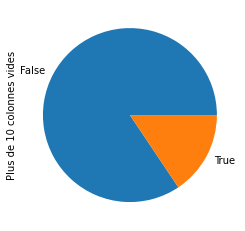

In [72]:
col_vides = (df.isnull().sum(axis = 1) >= 10) & ((df.pnns_groups_1 == 'unknown') | (df.pnns_groups_1.isna()))
col_vides_prop = col_vides.value_counts()/a.count()*100
col_vides_prop.plot.pie()
plt.ylabel("Plus de 10 colonnes vides")
print(col_vides_prop)

In [73]:
df.drop(df[col_vides].index, axis = 0, inplace = True)

##### Remplissage des données - logique métier

In [74]:
df.additives_n = df.additives_n.fillna(round(np.mean(df.additives_n),0))

In [75]:
df.fiber_100g = df.fiber_100g.fillna(0)

In [76]:
#df.loc[df['pnns_groups_1']=="Beverages",'fat_100g'] = df.loc[df['pnns_groups_1']=="Beverages"].fat_100g.fillna(tab_med.fat_100g['Beverages'])

In [77]:
#tab_mean = df.groupby('pnns_groups_1').mean()

##### Remplissage par la médiane par catégorie de produit

In [78]:
# Remplissage par la mediane, on donne le tableau, 
#                           la colonne sur laquelle on a fait le group_by (dans notre cas pnns_groups_1 mais peut changer donc mis en paramètre pour plus de souplesse)
import math
def remplissage_mean(df,feat_groupby):
    tab_med = df.groupby(feat_groupby).mean()
    #print(tab_med)
    for i in tab_med.columns:
        for j in df[feat_groupby].unique():
            try:
                if(math.isnan(j)):
                    continue                
            except:
                df.loc[df[feat_groupby]==j,i] = df.loc[df[feat_groupby]==j][i].fillna(tab_med[i][j])
    return df

In [79]:
#remplissage_median(df,'pnns_groups_1')

In [80]:
df.count()

product_name          71623
packaging             51315
brands                71165
additives_n           71623
nutrition_grade_fr    57875
pnns_groups_1         57858
pnns_groups_2         57906
energy_100g           60660
fat_100g              43894
saturated-fat_100g    58678
carbohydrates_100g    43464
sugars_100g           58749
fiber_100g            71623
proteins_100g         60290
salt_100g             58896
dtype: int64

In [81]:
df = remplissage_mean(df,'pnns_groups_2')

In [82]:
df.loc[df['saturated-fat_100g']>df['fat_100g'],'fat_100g'] = np.nan

In [83]:
df.loc[df['sugars_100g']>df['carbohydrates_100g'],'carbohydrates_100g'] = np.nan

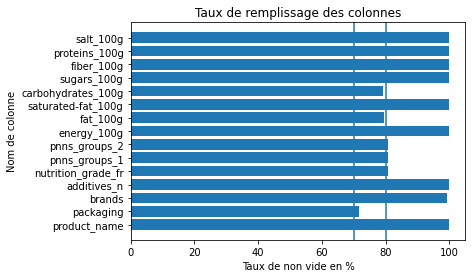

In [84]:
col = df.columns
col_nombre = df.count()
plt.title('Taux de remplissage des colonnes')
plt.ylabel("Nom de colonne")
plt.xlabel("Taux de non vide en %")
plt.barh(col,col_nombre/col_nombre[0]*100)
plt.axvline(x=70)
plt.axvline(x=80)
plt.show()

In [85]:
df.count()

product_name          71623
packaging             51315
brands                71165
additives_n           71623
nutrition_grade_fr    57875
pnns_groups_1         57858
pnns_groups_2         57906
energy_100g           71569
fat_100g              56891
saturated-fat_100g    71617
carbohydrates_100g    56663
sugars_100g           71617
fiber_100g            71623
proteins_100g         71511
salt_100g             71617
dtype: int64

##### Impute iterative

In [86]:
df.corr()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
additives_n,1.000000,0.051782,0.000174,-0.000696,0.123060,0.102922,-0.040940,-0.049641,0.006540
energy_100g,0.051782,1.000000,0.779198,0.583882,0.508692,0.320215,0.225432,0.207030,-0.016494
fat_100g,0.000174,0.779198,1.000000,0.751514,-0.072026,-0.015720,0.012229,0.157293,0.026199
saturated-fat_100g,-0.000696,0.583882,0.751514,1.000000,-0.031030,0.068625,-0.034506,0.163896,0.010932
carbohydrates_100g,0.123060,0.508692,-0.072026,-0.031030,1.000000,0.654420,0.291792,-0.155071,-0.077323
sugars_100g,0.102922,0.320215,-0.015720,0.068625,0.654420,1.000000,0.048423,-0.284048,-0.095008
fiber_100g,-0.040940,0.225432,0.012229,-0.034506,0.291792,0.048423,1.000000,0.085988,-0.025287
proteins_100g,-0.049641,0.207030,0.157293,0.163896,-0.155071,-0.284048,0.085988,1.000000,0.105360
salt_100g,0.006540,-0.016494,0.026199,0.010932,-0.077323,-0.095008,-0.025287,0.105360,1.000000


In [87]:
!pip3 install sklearn

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [89]:
df[df['fat_100g'].isna()]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
7,Mini Confettis,NaN,Alice Délice,2.0,d,NaN,NaN,1753.0,NaN,0.80,NaN,87.70,0.9,0.60,0.010
8,Praliné Amande Et Noisette,NaN,Alice Délice,2.0,d,NaN,NaN,2406.0,NaN,2.90,NaN,50.30,3.9,9.50,0.003
14,Tarte Poireaux Et Lardons,NaN,Bo Frost,2.0,d,NaN,NaN,1079.0,NaN,11.00,NaN,1.00,1.4,7.50,0.800
24,Beignets framboises,NaN,Intermarché,2.0,c,NaN,NaN,1272.0,NaN,1.70,NaN,12.70,0.0,5.80,0.700
44,Black & White Crispbread Sticks,NaN,Swedish By Nature,2.0,d,NaN,NaN,1674.0,NaN,1.80,NaN,5.50,10.0,15.00,2.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86852,Peanut & Popcorn With Dark Chocolate 12 x 45G,NaN,Great value,2.0,d,NaN,NaN,1883.0,NaN,7.80,NaN,34.10,5.4,10.90,0.400
86853,Eat Natural Protein Packed,NaN,Biobio,2.0,d,NaN,NaN,1996.0,NaN,10.00,NaN,22.00,6.0,22.00,1.000
86869,Verrine Cheescake Myrtille,NaN,Kayser,2.0,d,NaN,NaN,1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.290
86870,Fiche Brevet,NaN,Hatier,2.0,b,NaN,NaN,4.0,NaN,1.00,NaN,1.00,10.0,10.00,10.000


In [90]:
df.count()

product_name          71623
packaging             51315
brands                71165
additives_n           71623
nutrition_grade_fr    57875
pnns_groups_1         57858
pnns_groups_2         57906
energy_100g           71569
fat_100g              56891
saturated-fat_100g    71617
carbohydrates_100g    56663
sugars_100g           71617
fiber_100g            71623
proteins_100g         71511
salt_100g             71617
dtype: int64

In [91]:
imp = IterativeImputer()

In [92]:
X = df.loc[:,('fat_100g','saturated-fat_100g')]

In [93]:
imp.fit(X)

IterativeImputer()

In [94]:
imp.transform(X)[:,0]

array([ 5.58134236, 19.98489976,  1.61882586, ...,  7.4706872 ,
        0.2       , 17.59695427])

In [95]:
df.loc[df['saturated-fat_100g']>df['fat_100g']]

,product_name,packaging,brands,additives_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g


In [96]:
df = df.reset_index()
df.drop('index',axis = 1, inplace = True)

In [97]:
df['fat_100g'] = imp.transform(X)[:,0]

In [98]:
#df.loc[df['saturated-fat_100g']>df['fat_100g']]

In [99]:
X = df.loc[:,('carbohydrates_100g','sugars_100g')]

In [100]:
imp2 = IterativeImputer()

In [101]:
imp2.fit(X)

IterativeImputer()

In [102]:
df['carbohydrates_100g'] = imp2.transform(X)[:,0]

In [103]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,71623.000000,71569.000000,71623.000000,71617.000000,71623.000000,71617.000000,71623.000000,71511.000000,71617.000000
mean,1.937143,1082.765351,13.278371,5.243312,27.250724,13.054846,1.322196,7.577575,1.135383
std,2.132159,748.258867,15.932337,8.028994,25.063588,18.296174,2.501833,7.098734,3.754062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,423.000000,2.600000,0.400000,7.000000,1.100000,0.000000,1.900000,0.100000
50%,2.000000,1016.022714,7.800000,2.244839,17.000000,4.400000,0.000000,6.068690,0.600000
75%,2.000000,1582.000000,19.000000,6.772240,48.418121,16.000000,1.800000,10.700000,1.369775
max,31.000000,4000.000000,165.096360,100.000000,112.508891,100.000000,20.000000,40.000000,100.000000


Retrait des IterativeImputer absurde

In [104]:
df.loc[df.fat_100g>100,'fat_100g'] = np.nan
df.loc[df['carbohydrates_100g']>100,'carbohydrates_100g'] = np.nan
df.loc[df.fat_100g<0,'fat_100g'] = np.nan
df.loc[df.energy_100g==0,'energy_100g'] = np.nan
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,71623.000000,71264.000000,71534.000000,71617.000000,71485.000000,71617.000000,71623.000000,71511.000000,71617.000000
mean,1.937143,1087.399436,13.135015,5.243312,27.093627,13.054846,1.322196,7.577575,1.135383
std,2.132159,746.490757,15.397813,8.028994,24.830589,18.296174,2.501833,7.098734,3.754062
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,431.000000,2.600000,0.400000,7.000000,1.100000,0.000000,1.900000,0.100000
50%,2.000000,1016.022714,7.761579,2.244839,16.998718,4.400000,0.000000,6.068690,0.600000
75%,2.000000,1585.000000,19.000000,6.772240,48.418121,16.000000,1.800000,10.700000,1.369775
max,31.000000,4000.000000,100.000000,100.000000,100.000000,100.000000,20.000000,40.000000,100.000000


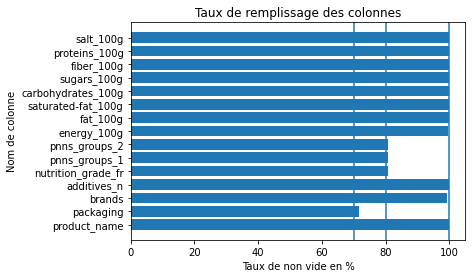

<Figure size 1440x720 with 0 Axes>

In [105]:
col = df.columns
col_nombre = df.count()
plt.title('Taux de remplissage des colonnes')
plt.ylabel("Nom de colonne")
plt.xlabel("Taux de non vide en %")
plt.barh(col,col_nombre/col_nombre[0]*100)
plt.axvline(x=70)
plt.axvline(x=80)
plt.axvline(x=100)
plt.figure(figsize=(20, 10))
plt.show()

In [106]:
df = df.drop_duplicates()
df.count()

product_name          71621
packaging             51313
brands                71163
additives_n           71621
nutrition_grade_fr    57873
pnns_groups_1         57856
pnns_groups_2         57904
energy_100g           71262
fat_100g              71532
saturated-fat_100g    71615
carbohydrates_100g    71483
sugars_100g           71615
fiber_100g            71621
proteins_100g         71509
salt_100g             71615
dtype: int64

### Dernière vérification

In [107]:
#df.loc[df['saturated-fat_100g']>df['fat_100g']]

In [108]:
#df.loc[df['sugars_100g']>df['carbohydrates_100g']]

In [109]:
col_interet = ['fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g']
a = np.sum(df.loc[:,col_interet], axis = 1)>105
df[a]
df.drop(df[a].index,axis = 0, inplace = True)

### Extract

On a bien rempli la quasi-totalité de nos valeurs quantitatives, et pouvont à présent, effectuer notre analyse exploratoire

Sauvegarde de notre jeu de données dans un fichier .csv

In [110]:
df.to_csv('/home/fayz/Documents/OpenClassrooms/Projet2/food_clean.csv',index = False)